In [40]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd
import rosbag

from geometry_msgs.msg import Point, Quaternion, Vector3
from snapstack_msgs.msg import State, Goal, AttitudeCommand, ControlLog, QuadFlightMode

plt.rcParams.update({'font.size': 24})

In [41]:
filename = '_2024-04-19-02-41-38.bag'
b = bagreader(f'../rosbags/{filename}')

# replace the topic name as per your need
topic_log = b.message_by_topic('/HX14s/log')
df_log = pd.read_csv(topic_log)
print(df_log.keys())

[INFO]  Data folder ../rosbags/_2024-04-19-02-41-38 already exists. Not creating.
Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'p.x', 'p.y', 'p.z', 'p_ref.x', 'p_ref.y', 'p_ref.z',
       'p_err.x', 'p_err.y', 'p_err.z', 'p_err_int.x', 'p_err_int.y',
       'p_err_int.z', 'v.x', 'v.y', 'v.z', 'v_ref.x', 'v_ref.y', 'v_ref.z',
       'v_err.x', 'v_err.y', 'v_err.z', 'a_ff.x', 'a_ff.y', 'a_ff.z', 'a_fb.x',
       'a_fb.y', 'a_fb.z', 'j_ff.x', 'j_ff.y', 'j_ff.z', 'j_fb.x', 'j_fb.y',
       'j_fb.z', 'q.x', 'q.y', 'q.z', 'q.w', 'q_ref.x', 'q_ref.y', 'q_ref.z',
       'q_ref.w', 'rpy.x', 'rpy.y', 'rpy.z', 'rpy_ref.x', 'rpy_ref.y',
       'rpy_ref.z', 'w.x', 'w.y', 'w.z', 'w_ref.x', 'w_ref.y', 'w_ref.z',
       'F_W.x', 'F_W.y', 'F_W.z', 'P_norm', 'A_norm', 'y_norm', 'f_hat.x',
       'f_hat.y', 'f_hat.z', 'power'],
      dtype='object')


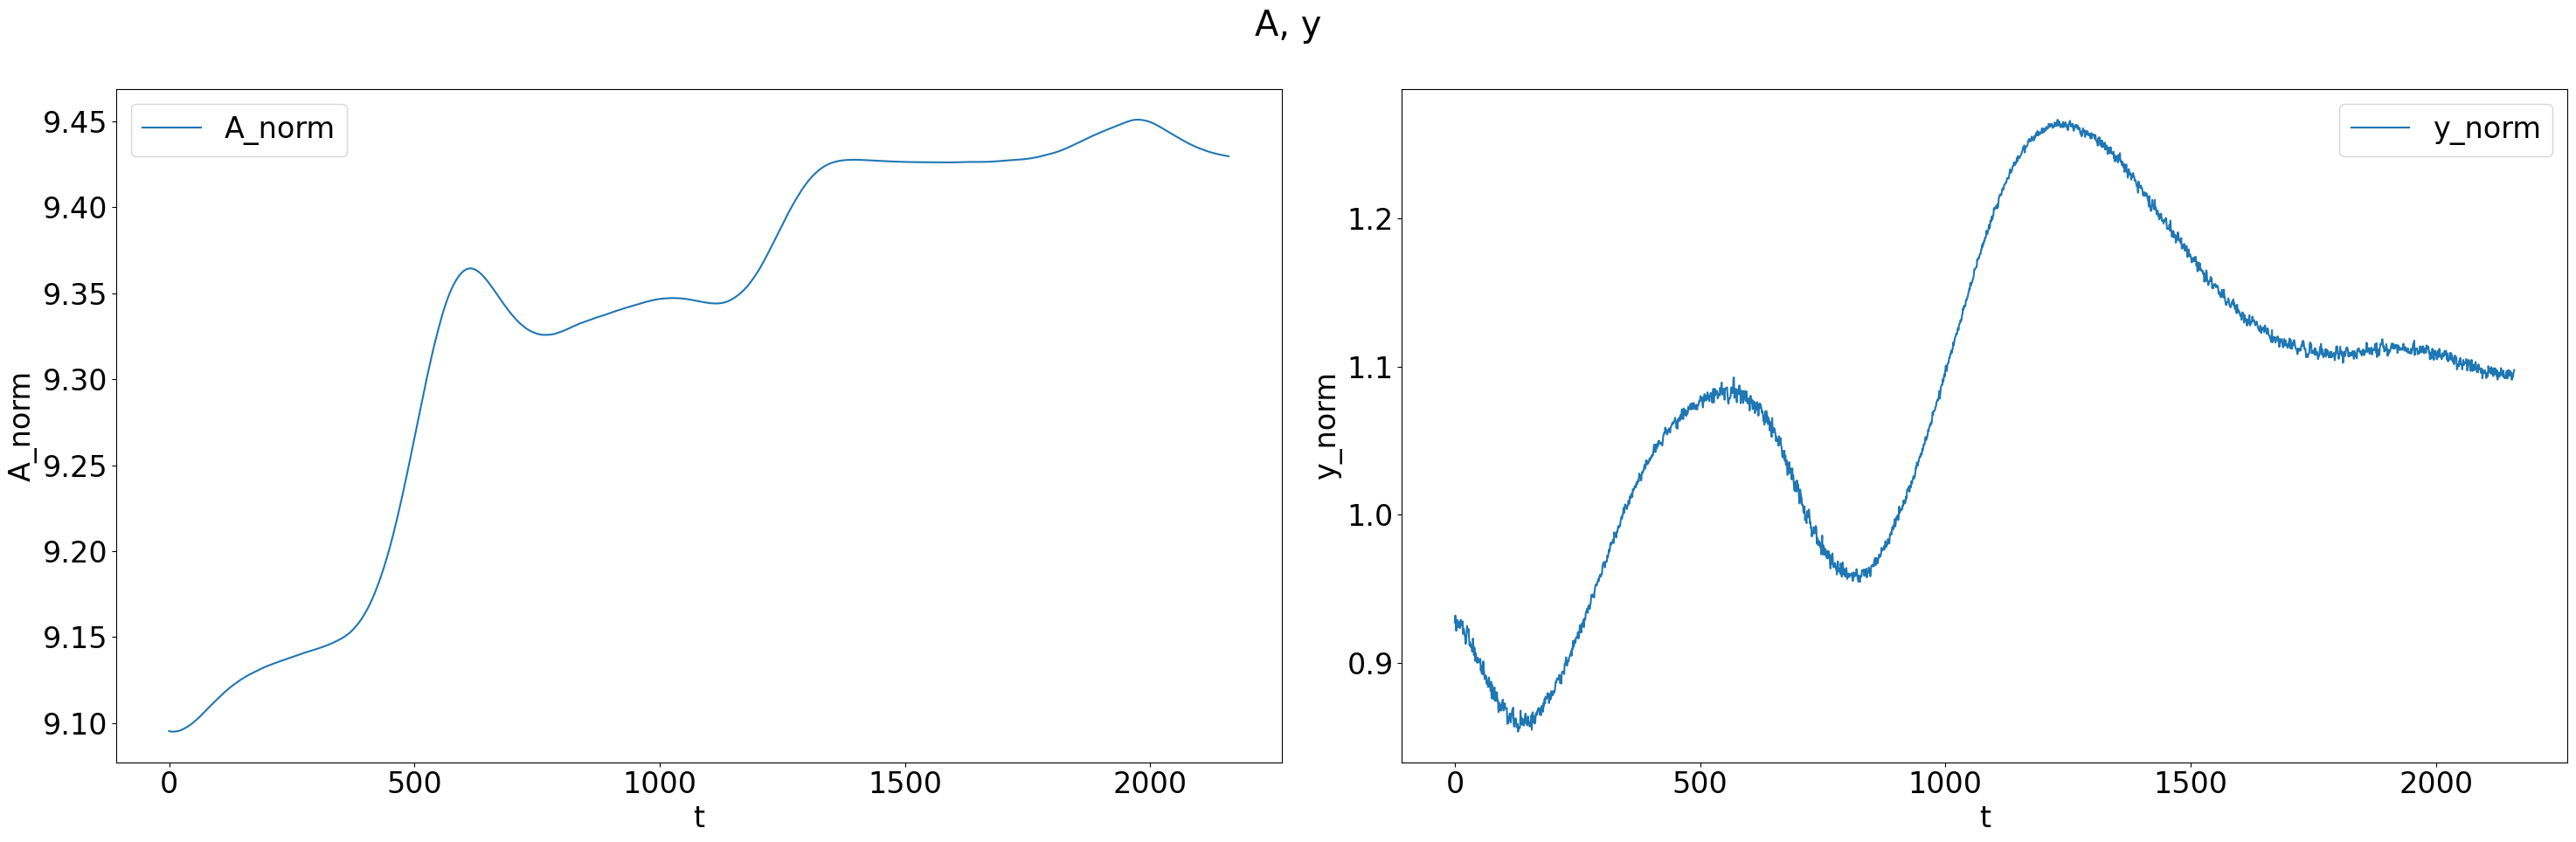

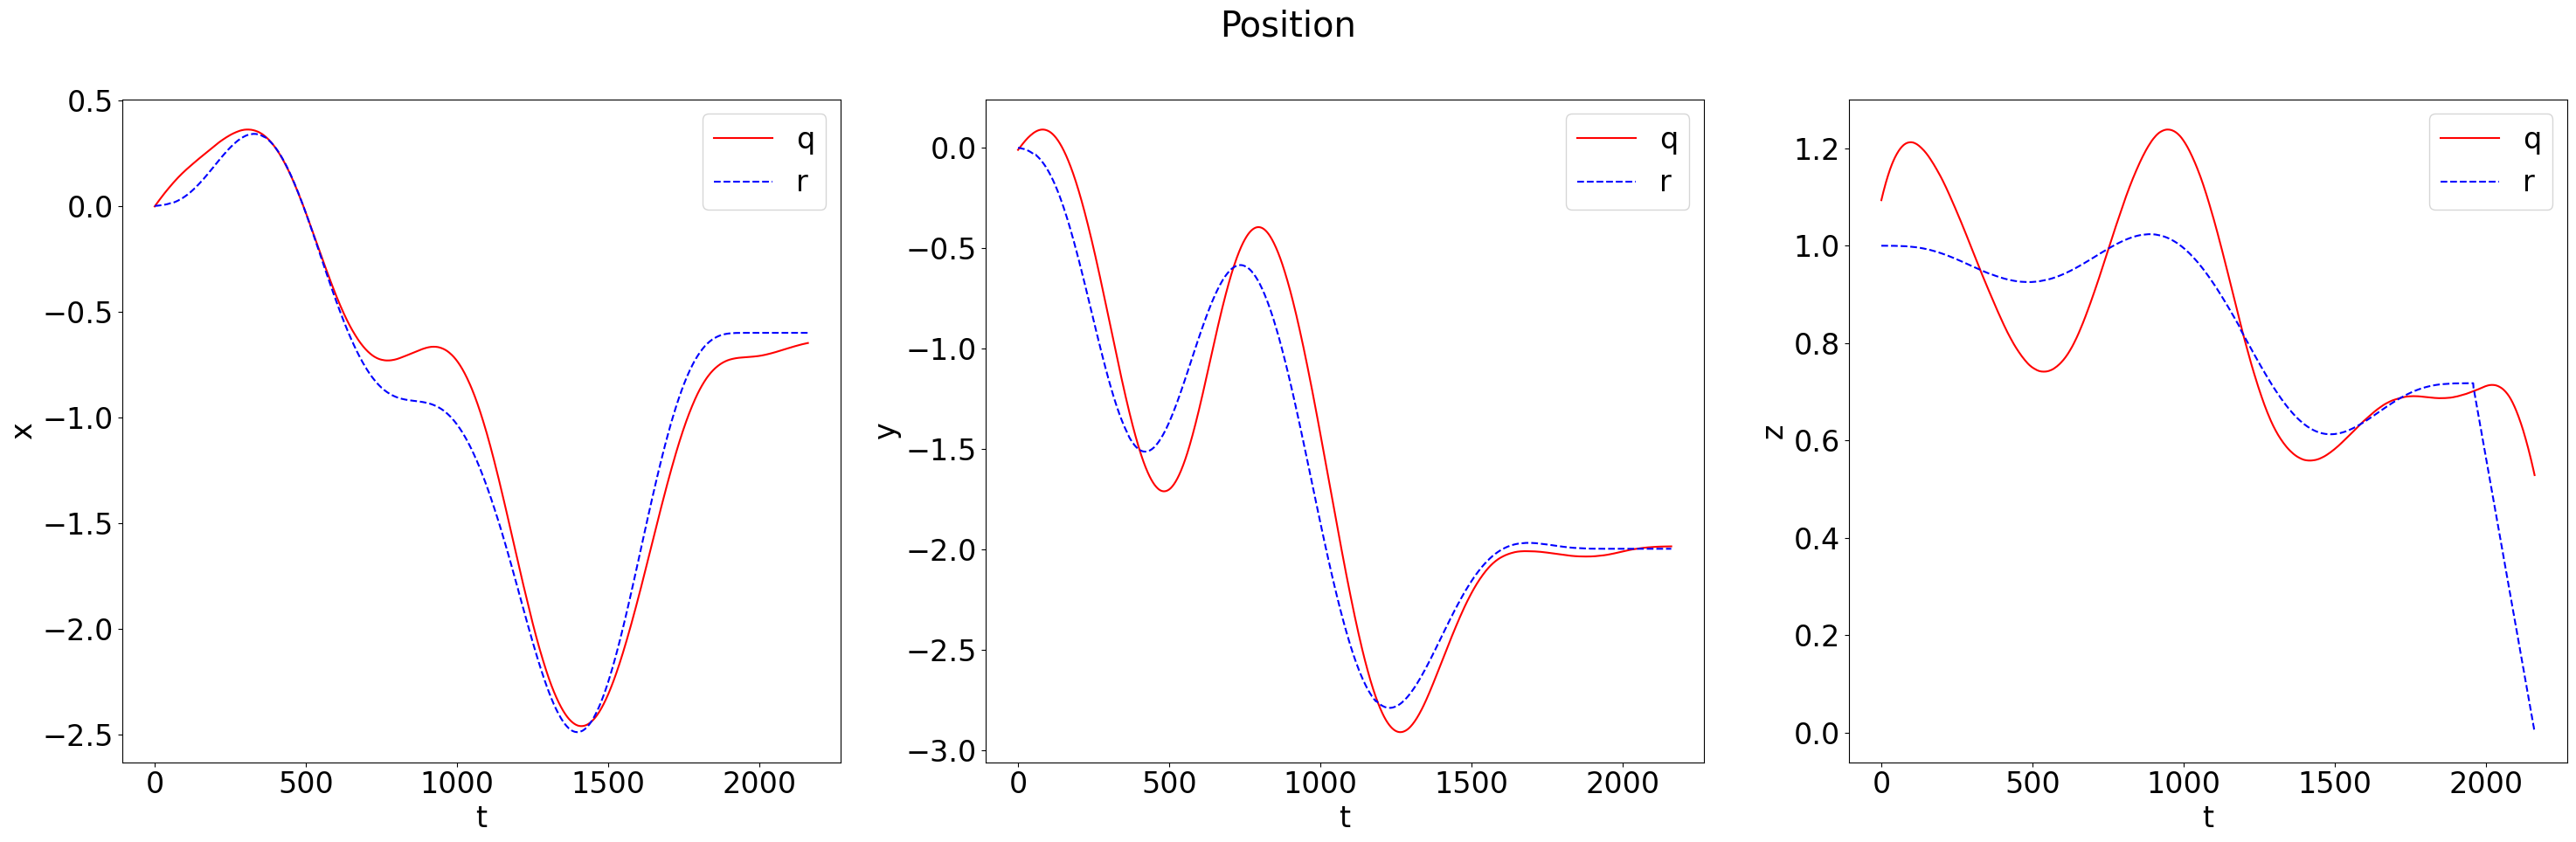

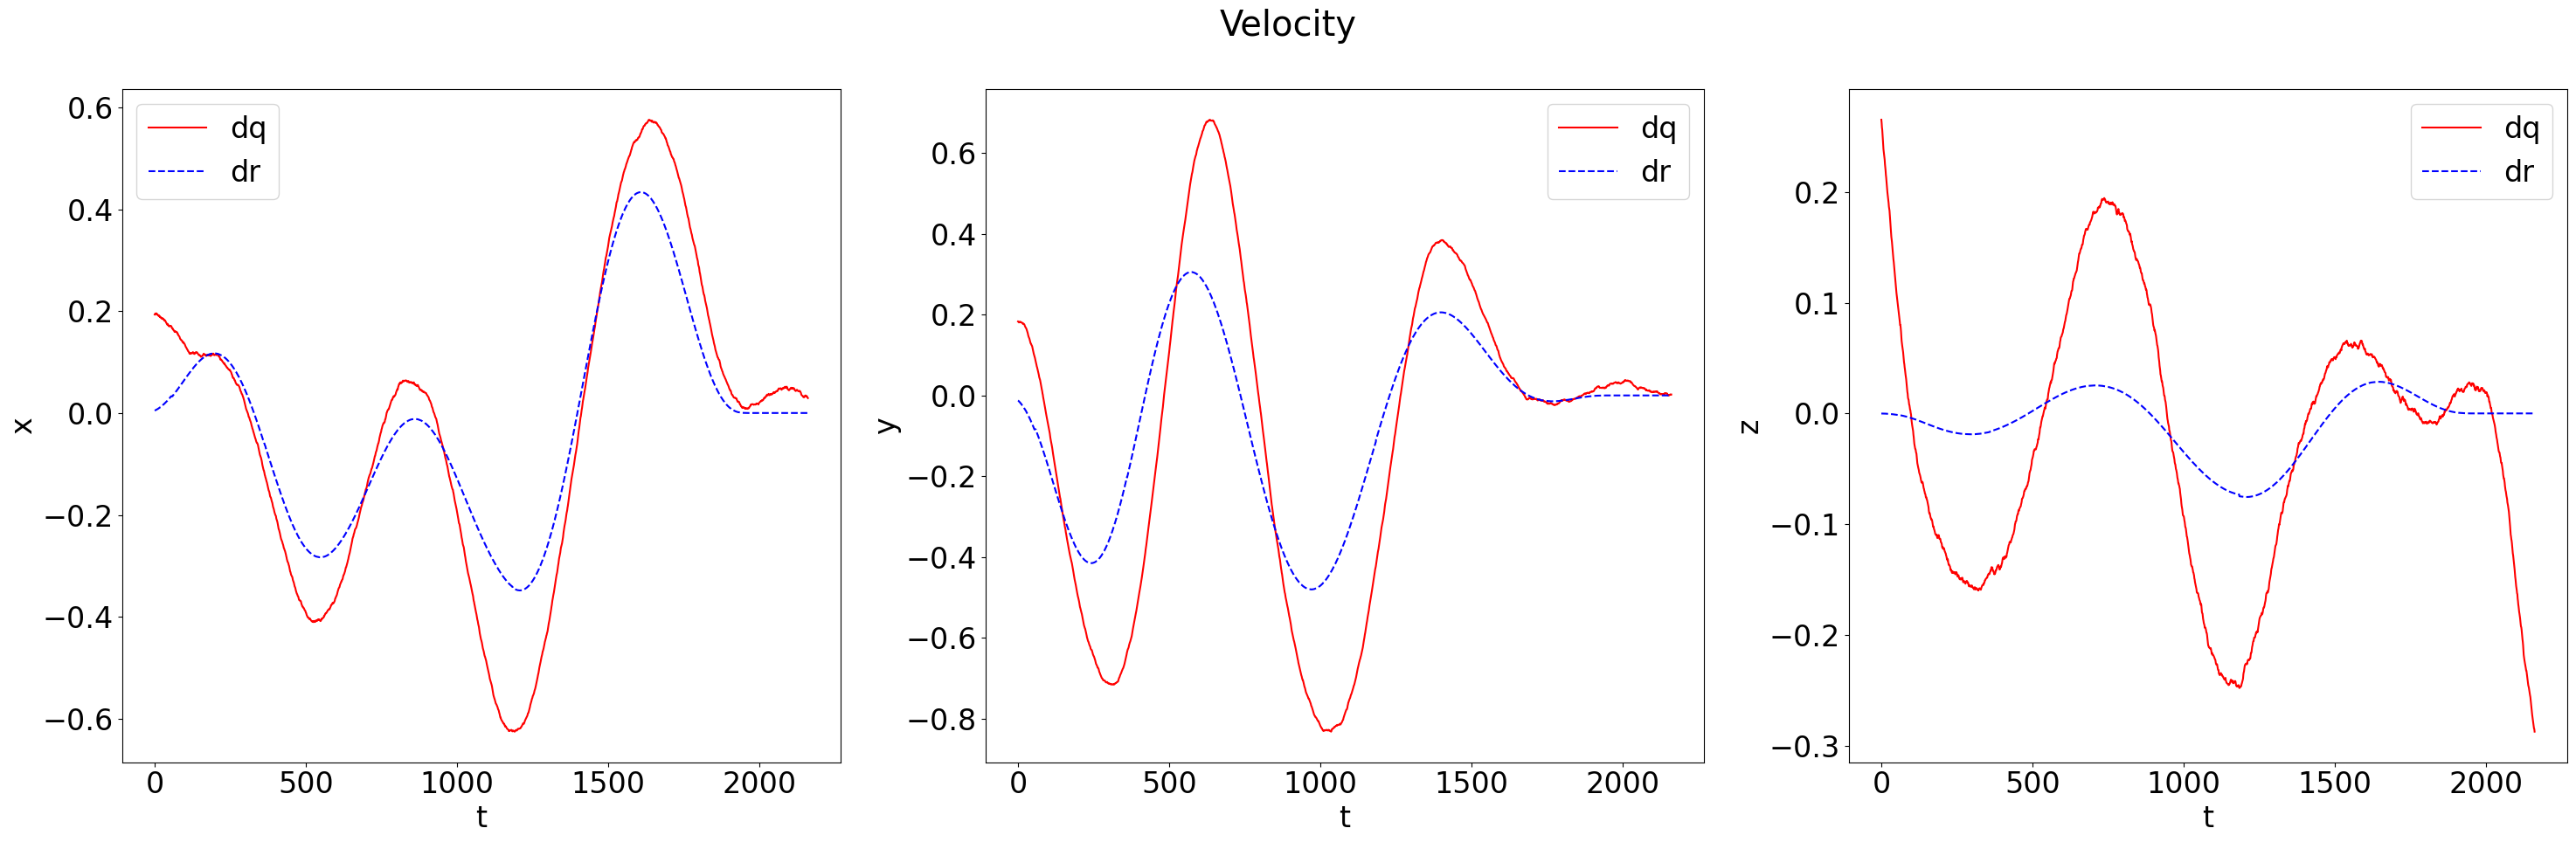

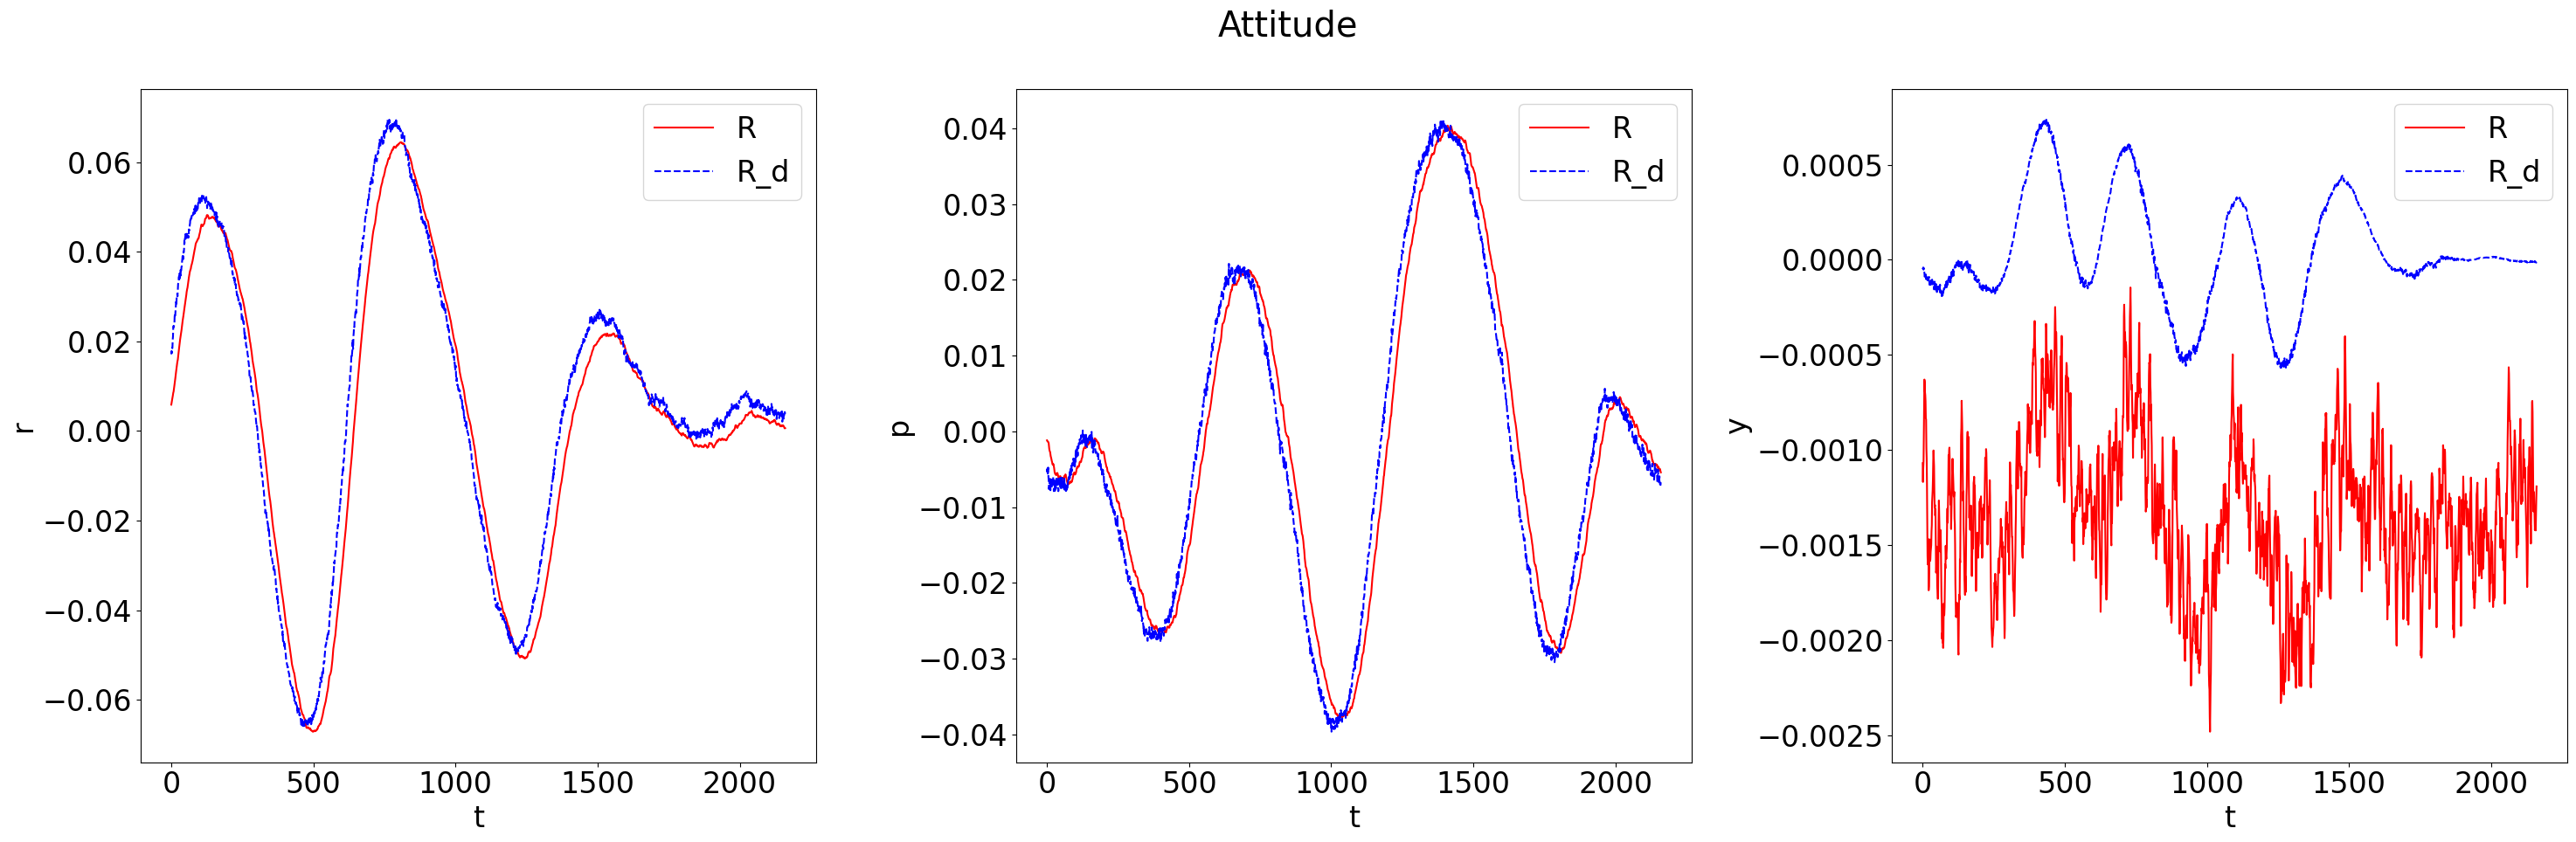

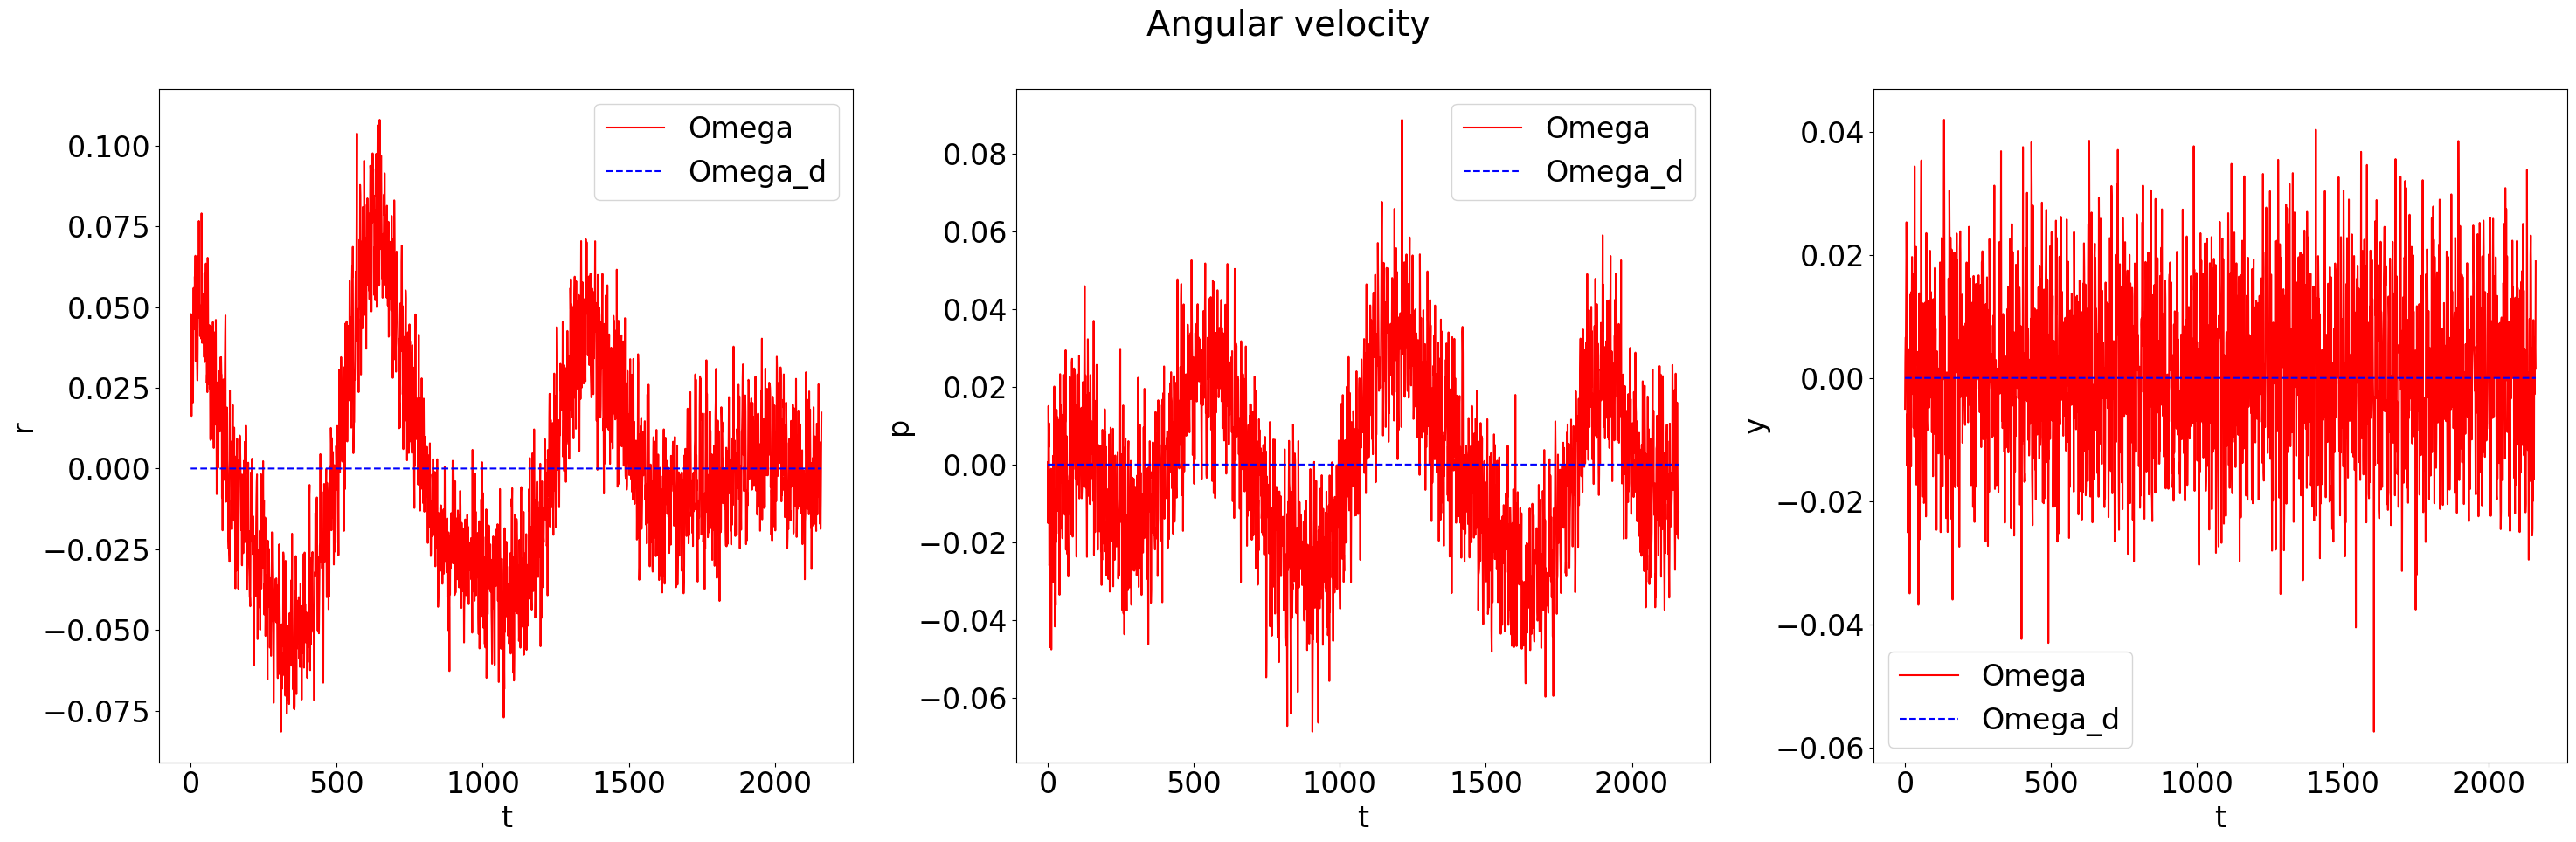

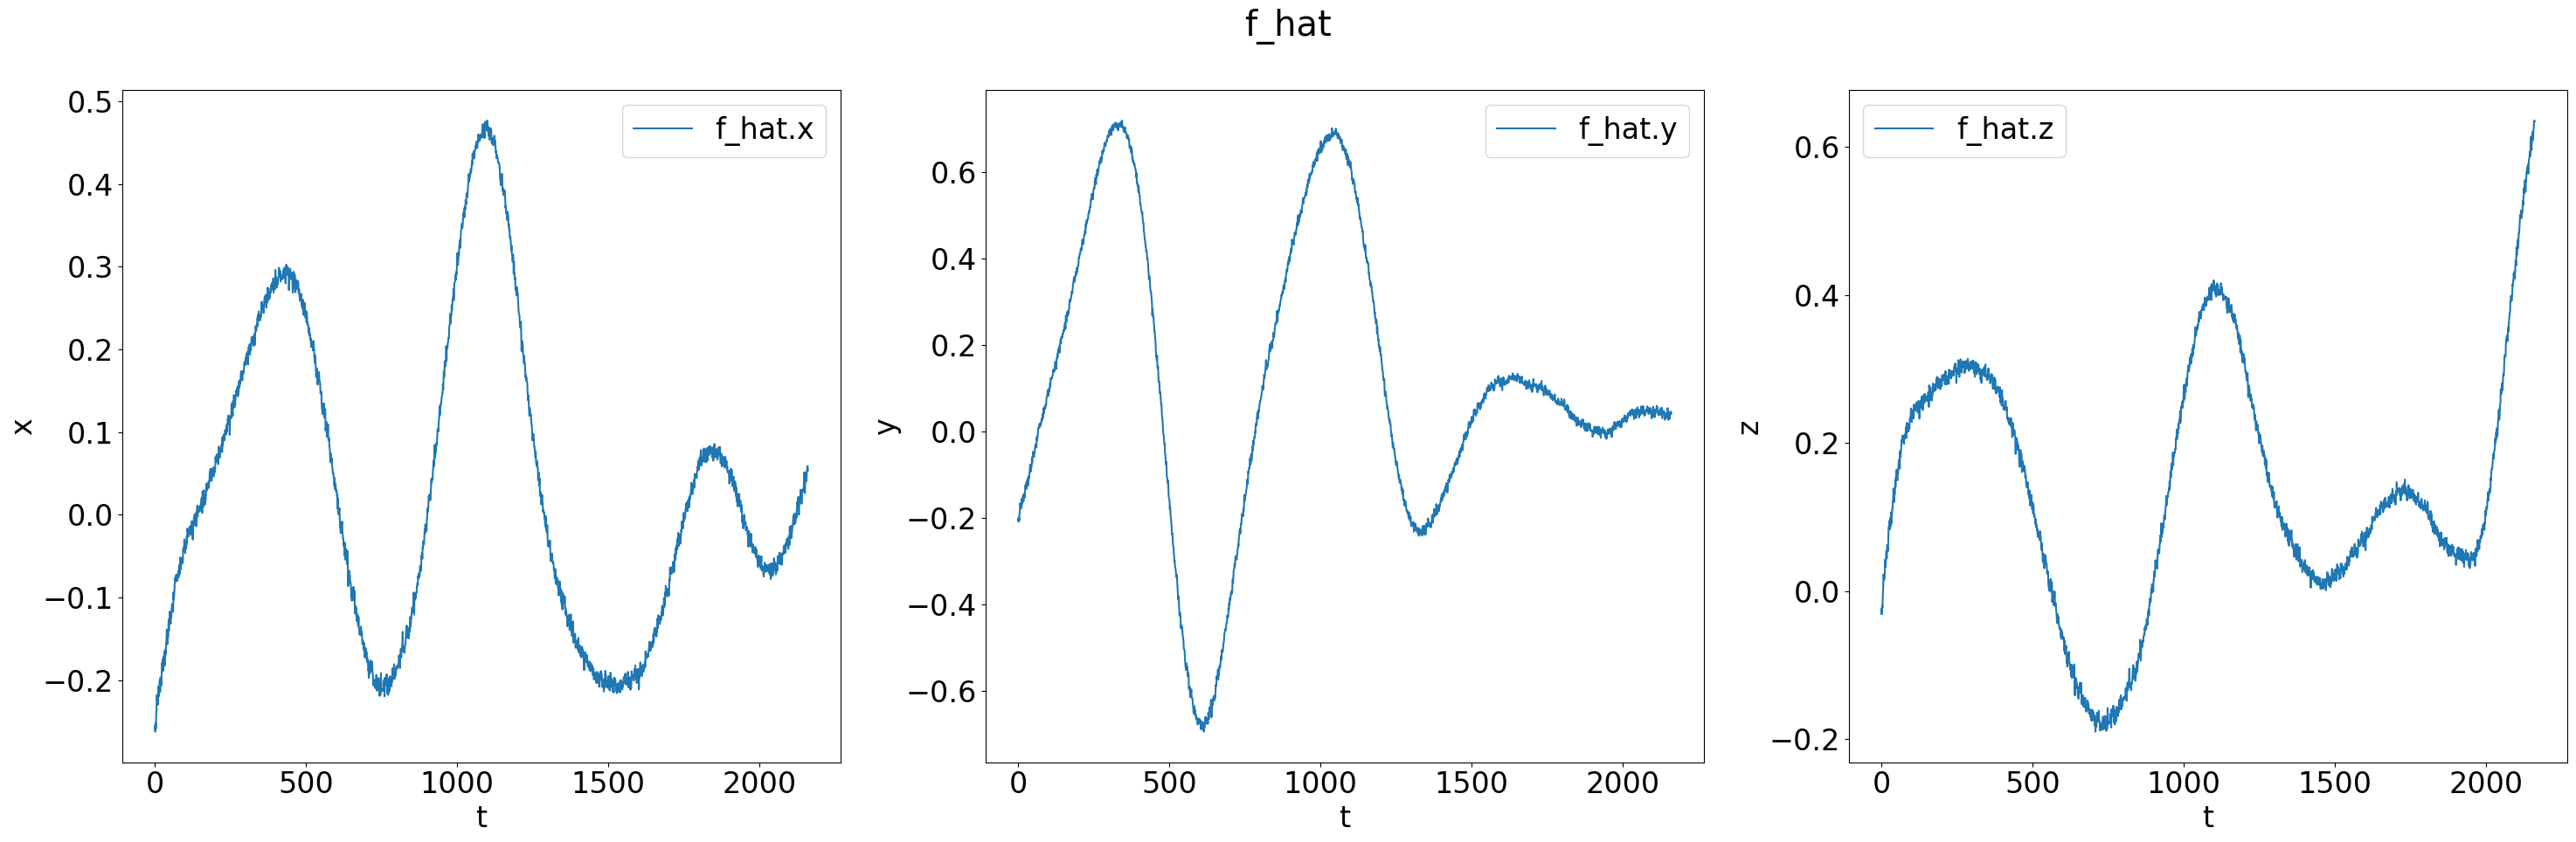

In [43]:
def plot(df_log, xlim_left=None, xlim_right=None):
    # A, y
    fig, axes = plt.subplots(1, 2, figsize=(30, 10))

    df_log['A_norm'].plot(ax=axes[0])
    axes[0].set_ylabel('A_norm')
    axes[0].set_xlabel('t')
    axes[0].set_xlim(left=xlim_left, right=xlim_right)
    axes[0].legend()

    df_log['y_norm'].plot(ax=axes[1])
    axes[1].set_ylabel('y_norm')
    axes[1].set_xlabel('t')
    axes[1].legend()
    axes[1].set_xlim(left=xlim_left, right=xlim_right)

    fig.suptitle('A, y')
    plt.tight_layout()
    plt.show()

    # Position
    fig, axes =plt.subplots(1, 3, figsize=(30, 10))

    df_log['p.x'].plot(ax=axes[0], style='r-', label='q')
    df_log['p_ref.x'].plot(ax=axes[0], style='b--', label='r')
    axes[0].set_ylabel('x')
    axes[0].set_xlabel('t')
    axes[0].set_xlim(left=xlim_left, right=xlim_right)
    axes[0].legend()

    df_log['p.y'].plot(ax=axes[1], style='r-', label='q')
    df_log['p_ref.y'].plot(ax=axes[1], style='b--', label='r')
    axes[1].set_ylabel('y')
    axes[1].set_xlabel('t')
    axes[1].set_xlim(left=xlim_left, right=xlim_right)
    axes[1].legend()

    df_log['p.z'].plot(ax=axes[2], style='r-', label='q')
    df_log['p_ref.z'].plot(ax=axes[2], style='b--', label='r')
    axes[2].set_ylabel('z')
    axes[2].set_xlabel('t')
    axes[2].set_xlim(left=xlim_left, right=xlim_right)
    axes[2].legend()

    fig.suptitle('Position')
    plt.tight_layout()
    plt.show()

    # Velocity
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))

    df_log['v.x'].plot(ax=axes[0], style='r-', label='dq')
    df_log['v_ref.x'].plot(ax=axes[0], style='b--',label='dr')
    axes[0].set_ylabel('x')
    axes[0].set_xlabel('t')
    axes[0].set_xlim(left=xlim_left, right=xlim_right)
    axes[0].legend()

    df_log['v.y'].plot(ax=axes[1], style='r-', label='dq')
    df_log['v_ref.y'].plot(ax=axes[1], style='b--',label='dr')
    axes[1].set_ylabel('y')
    axes[1].set_xlabel('t')
    axes[1].set_xlim(left=xlim_left, right=xlim_right)
    axes[1].legend()

    df_log['v.z'].plot(ax=axes[2], style='r-', label='dq')
    df_log['v_ref.z'].plot(ax=axes[2], style='b--',label='dr')
    axes[2].set_ylabel('z')
    axes[2].set_xlabel('t')
    axes[2].set_xlim(left=xlim_left, right=xlim_right)
    axes[2].legend()

    fig.suptitle('Velocity')
    plt.tight_layout()
    plt.show()

    # Attitude
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))

    df_log['rpy.x'].plot(ax=axes[0], style='r-', label='R')
    df_log['rpy_ref.x'].plot(ax=axes[0], style='b--', label='R_d')
    axes[0].set_ylabel('r')
    axes[0].set_xlabel('t')
    axes[0].set_xlim(left=xlim_left, right=xlim_right)
    axes[0].legend()

    df_log['rpy.y'].plot(ax=axes[1], style='r-', label='R')
    df_log['rpy_ref.y'].plot(ax=axes[1], style='b--', label='R_d')
    axes[1].set_ylabel('p')
    axes[1].set_xlabel('t')
    axes[1].set_xlim(left=xlim_left, right=xlim_right)
    axes[1].legend()

    df_log['rpy.z'].plot(ax=axes[2], style='r-', label='R')
    df_log['rpy_ref.z'].plot(ax=axes[2], style='b--', label='R_d')
    axes[2].set_ylabel('y')
    axes[2].set_xlabel('t')
    axes[2].set_xlim(left=xlim_left, right=xlim_right)
    axes[2].legend()

    fig.suptitle('Attitude')
    plt.tight_layout()
    plt.show()

    # Angular velocity
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))

    df_log['w.x'].plot(ax=axes[0], style='r-', label='Omega')
    df_log['w_ref.x'].plot(ax=axes[0], style='b--', label='Omega_d')
    axes[0].set_ylabel('r')
    axes[0].set_xlabel('t')
    axes[0].set_xlim(left=xlim_left, right=xlim_right)
    axes[0].legend()

    df_log['w.y'].plot(ax=axes[1], style='r-', label='Omega')
    df_log['w_ref.y'].plot(ax=axes[1], style='b--', label='Omega_d')
    axes[1].set_ylabel('p')
    axes[1].set_xlabel('t')
    axes[1].set_xlim(left=xlim_left, right=xlim_right)
    axes[1].legend()

    df_log['w.z'].plot(ax=axes[2], style='r-', label='Omega')
    df_log['w_ref.z'].plot(ax=axes[2], style='b--', label='Omega_d')
    axes[2].set_ylabel('y')
    axes[2].set_xlabel('t')
    axes[2].set_xlim(left=xlim_left, right=xlim_right)
    axes[2].legend()

    fig.suptitle('Angular velocity')
    plt.tight_layout()
    plt.show()

    # f_hat
    fig, axes = plt.subplots(1, 3, figsize=(30, 10))

    df_log['f_hat.x'].plot(ax=axes[0])
    axes[0].set_ylabel('x')
    axes[0].set_xlabel('t')
    axes[0].set_xlim(left=xlim_left, right=xlim_right)
    axes[0].legend()

    df_log['f_hat.y'].plot(ax=axes[1])
    axes[1].set_ylabel('y')
    axes[1].set_xlabel('t')
    axes[1].legend()
    axes[1].set_xlim(left=xlim_left, right=xlim_right)

    df_log['f_hat.z'].plot(ax=axes[2])
    axes[2].set_ylabel('z')
    axes[2].set_xlabel('t')
    axes[2].legend()

    fig.suptitle('f_hat')
    axes[2].set_xlim(left=xlim_left, right=xlim_right)
    plt.tight_layout()
    plt.show()

# plot(df_log, xlim_left=0, xlim_right=10)
plot(df_log)
